In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_df=pd.read_csv('train.csv')


In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# gender distribution of passengers

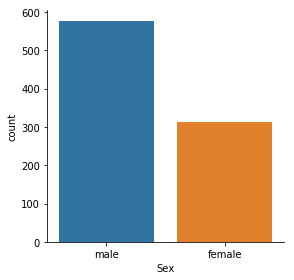

In [5]:
sns.factorplot('Sex', data=titanic_df, kind='count')

In [7]:
# sex distribution in different classes

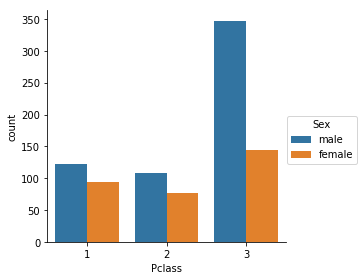

In [6]:
sns.factorplot('Pclass', hue='Sex', data=titanic_df, kind='count')

In [9]:
# finding split between males, females, children--children are below 16 years

In [7]:
def male_female_child(passenger):
        age,sex= passenger
        if age<16:
            return 'child'
        else:
            return sex

In [8]:
titanic_df['Person']=titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [9]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


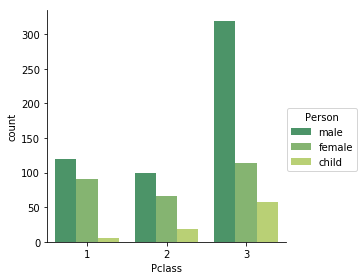

In [10]:
sns.factorplot('Pclass',data=titanic_df,hue='Person',palette='summer',kind='count')

In [11]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

In [12]:
# Age distribution

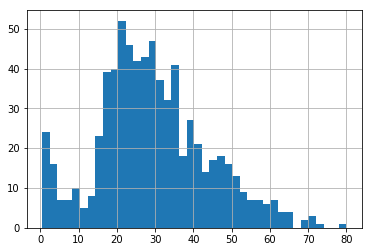

In [13]:
titanic_df['Age'].hist(bins=40)

In [14]:
# use facetgrid

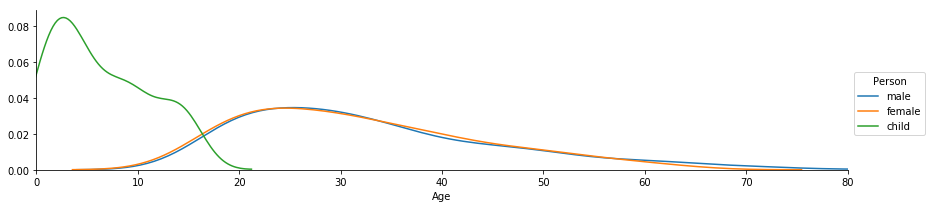

In [15]:
fig= sns.FacetGrid(titanic_df, hue= 'Person', aspect=4)
fig.map(sns.kdeplot, 'Age')
fig.set(xlim=(0,titanic_df['Age'].max()))
fig.add_legend()

In [16]:
#  What deck were the passengers on and how does that relate to their class?

In [17]:
# deck information is present in cabin column

In [18]:
cabin=titanic_df['Cabin'].dropna()

In [19]:
deck=[]
for x in cabin:
    deck.append(x[0])

In [20]:
deck_df=DataFrame(deck,columns=['Deck'])

In [21]:
deck_df.head()

,Deck
0,C
1,C
2,E
3,G
4,C


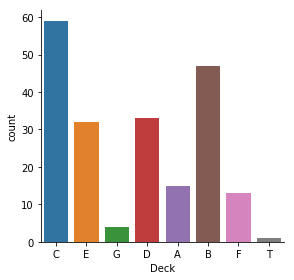

In [22]:
sns.factorplot('Deck',data=deck_df, kind='count')

In [23]:
deck_df=deck_df[deck_df.Deck !='T']

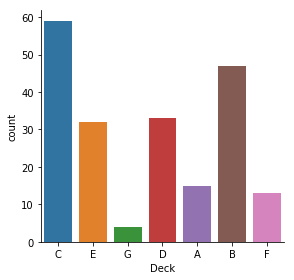

In [24]:
sns.factorplot('Deck',data=deck_df, kind='count')

In [30]:
deck_df['Class']=titanic_df['Pclass']

/Users/anushreetak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
deck_df.head()

,Deck,Class
0,C,3
1,C,1
2,E,3
3,G,1
4,C,3


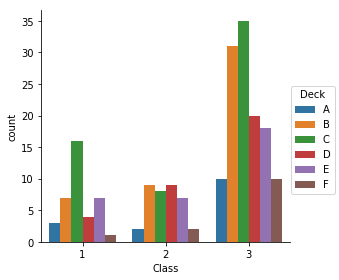

In [31]:
sns.factorplot('Class',data=deck_df,hue='Deck',kind='count',hue_order=['A','B','C','D','E','F'])

In [28]:
# Where did the passengers come from?

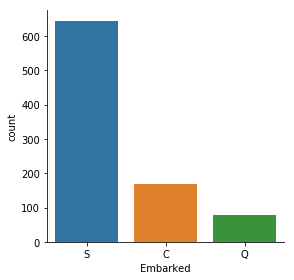

In [32]:
sns.factorplot('Embarked',data=titanic_df, kind='count')

In [33]:
# Who was alone and who was with family?

In [35]:
titanic_df['Alone']=titanic_df['SibSp']+titanic_df['Parch']

In [38]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='with family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='alone'

/Users/anushreetak/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


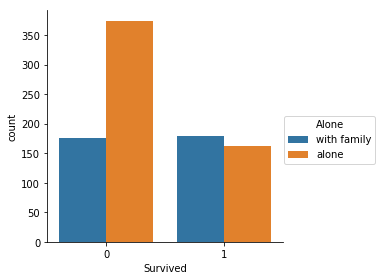

In [42]:
sns.factorplot('Survived',data=titanic_df, hue='Alone',kind='count')

In [43]:
# What factors helped someone survive the sinking?

In [46]:
titanic_df['Survived'].value_counts()

no     549
yes    342
Name: Survived, dtype: int64

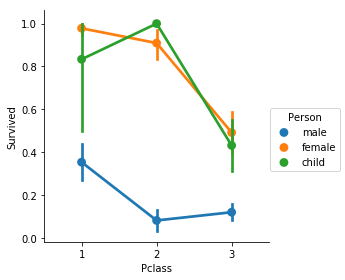

In [75]:
sns.factorplot('Pclass','Survived',hue='Person', data=titanic_df)

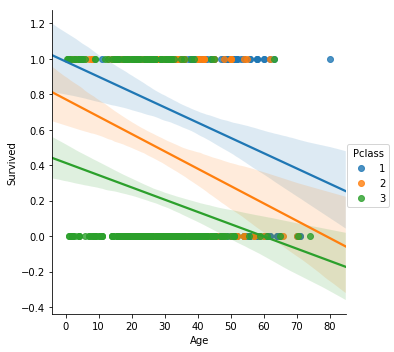

In [79]:
sns.lmplot('Age','Survived', data=titanic_df, hue='Pclass')


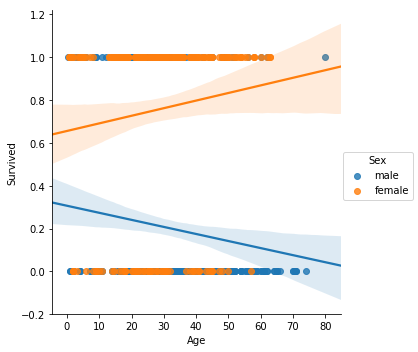

In [80]:
sns.lmplot('Age','Survived', data=titanic_df, hue='Sex')

In [85]:
deck_df['Survived']=titanic_df['Survived']

/Users/anushreetak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


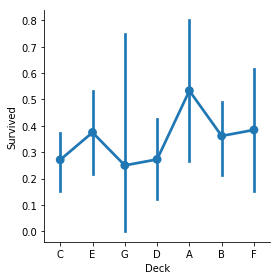

In [97]:
sns.factorplot('Deck','Survived', data=deck_df)